# Section 2: Hyperparameters

## Task 1: Hyperparameter Optimization

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [18]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
    nn.Softmax(dim=1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [19]:
iris = load_iris()

X = torch.tensor(iris.data)
y = torch.tensor(iris.target)

scaler = MinMaxScaler()
X = torch.tensor(scaler.fit_transform(X)).to(device)

encoder = OneHotEncoder()
y = torch.tensor(encoder.fit_transform(y.reshape(-1, 1)).toarray()).to(device)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2 / 3, random_state=42)

In [20]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


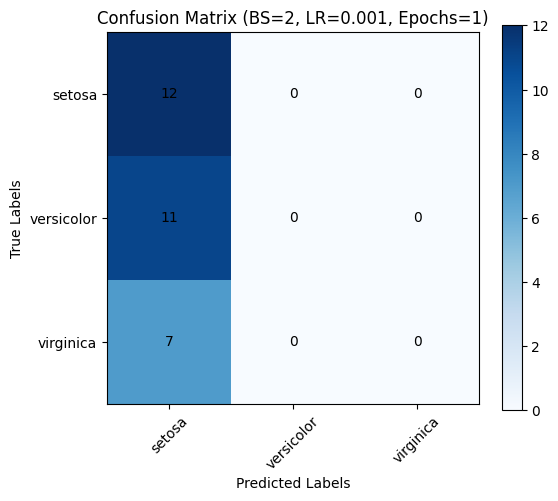

Sample Predictions:
Input: [0.16666667 0.45833333 0.08474576 0.        ], Predicted: 0, True: 0
Input: [1.         0.75       0.91525424 0.79166667], Predicted: 0, True: 2
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.55555556 0.20833333 0.6779661  0.75      ], Predicted: 0, True: 2
Input: [0.33333333 0.625      0.05084746 0.04166667], Predicted: 0, True: 0


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


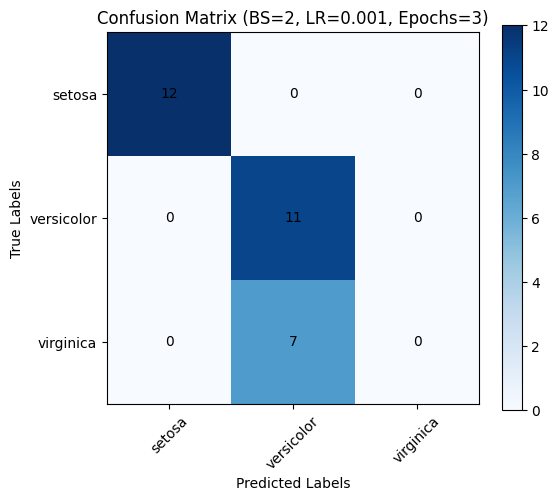

Sample Predictions:
Input: [0.13888889 0.45833333 0.10169492 0.04166667], Predicted: 0, True: 0
Input: [0.47222222 0.375      0.59322034 0.58333333], Predicted: 1, True: 1
Input: [0.38888889 1.         0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.66666667 0.41666667 0.71186441 0.91666667], Predicted: 1, True: 2
Input: [0.55555556 0.54166667 0.62711864 0.625     ], Predicted: 1, True: 1


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


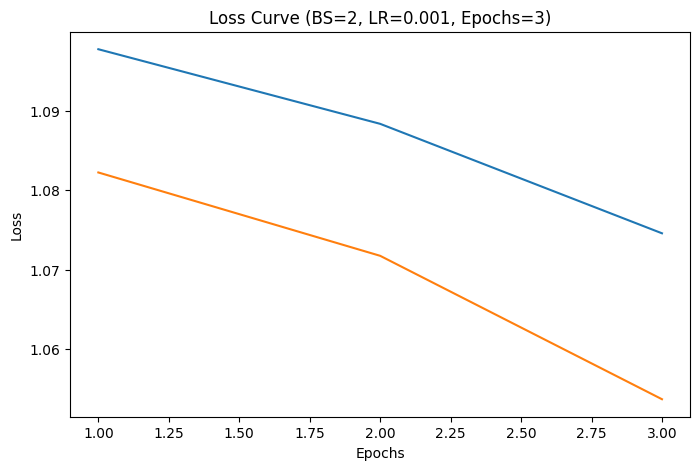

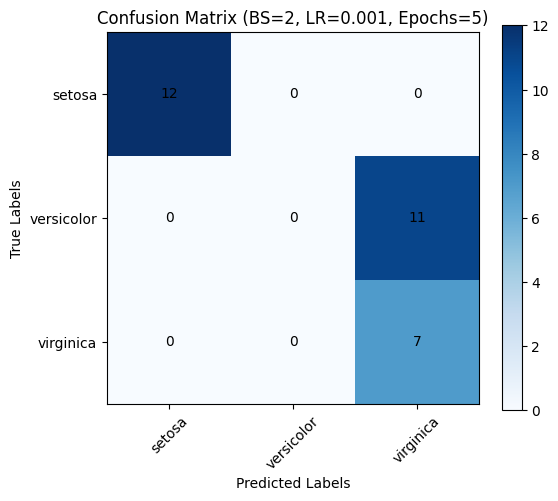

/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sample Predictions:
Input: [0.55555556 0.54166667 0.62711864 0.625     ], Predicted: 2, True: 1
Input: [0.66666667 0.20833333 0.81355932 0.70833333], Predicted: 2, True: 2
Input: [0.61111111 0.41666667 0.81355932 0.875     ], Predicted: 2, True: 2
Input: [0.08333333 0.66666667 0.         0.04166667], Predicted: 0, True: 0
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0


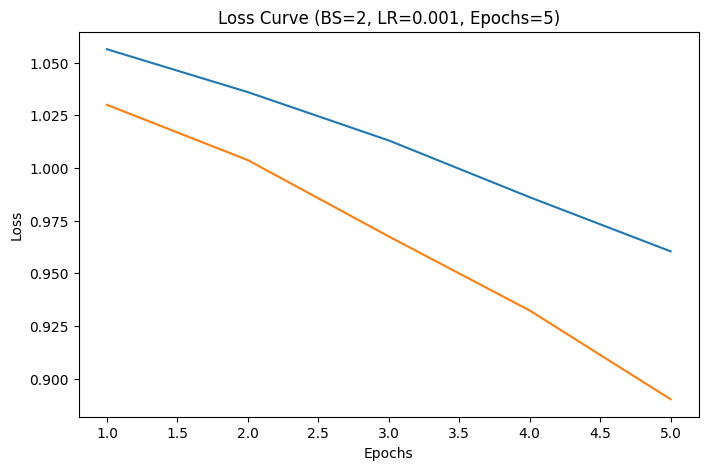

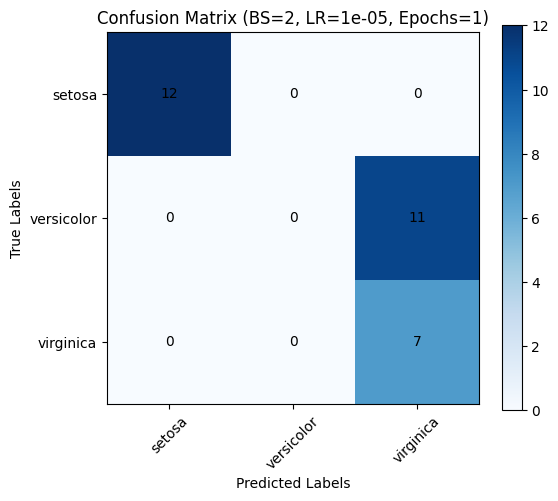

Sample Predictions:
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.36111111 0.375      0.44067797 0.5       ], Predicted: 2, True: 1
Input: [0.52777778 0.08333333 0.59322034 0.58333333], Predicted: 2, True: 1
Input: [0.38888889 0.75       0.11864407 0.08333333], Predicted: 0, True: 0
Input: [0.66666667 0.20833333 0.81355932 0.70833333], Predicted: 2, True: 2


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


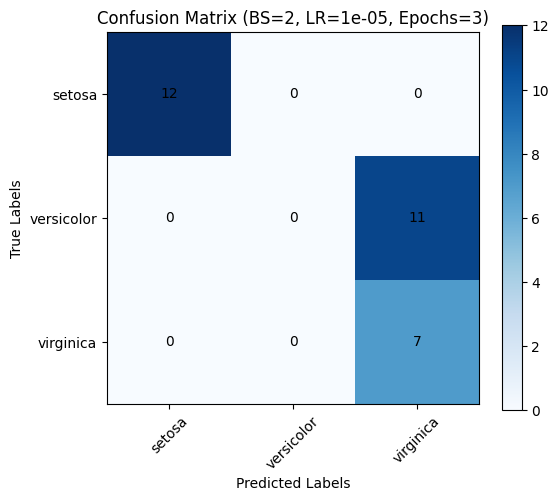

Sample Predictions:
Input: [1.         0.75       0.91525424 0.79166667], Predicted: 2, True: 2
Input: [0.52777778 0.08333333 0.59322034 0.58333333], Predicted: 2, True: 1
Input: [0.55555556 0.20833333 0.6779661  0.75      ], Predicted: 2, True: 2
Input: [0.61111111 0.41666667 0.81355932 0.875     ], Predicted: 2, True: 2
Input: [0.13888889 0.41666667 0.06779661 0.        ], Predicted: 0, True: 0


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


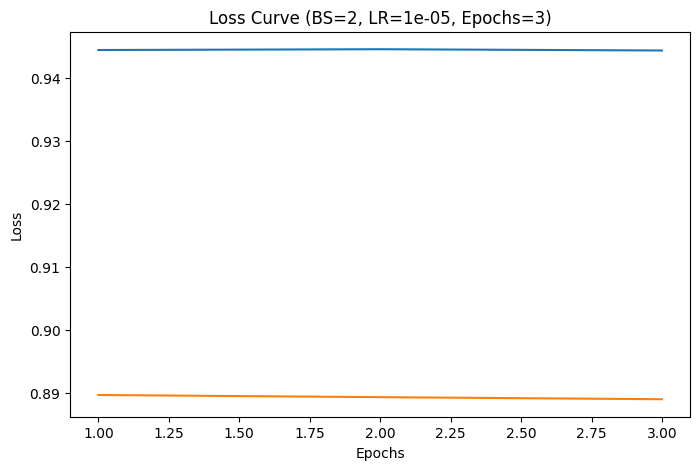

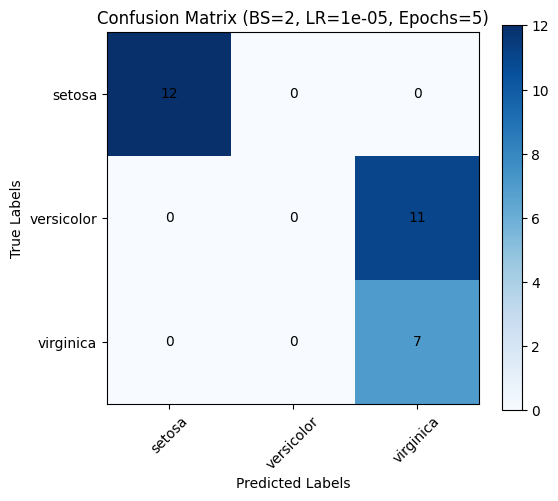

/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sample Predictions:
Input: [0.25       0.875      0.08474576 0.        ], Predicted: 0, True: 0
Input: [0.5        0.33333333 0.62711864 0.45833333], Predicted: 2, True: 1
Input: [0.47222222 0.58333333 0.59322034 0.625     ], Predicted: 2, True: 1
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.16666667 0.45833333 0.08474576 0.        ], Predicted: 0, True: 0


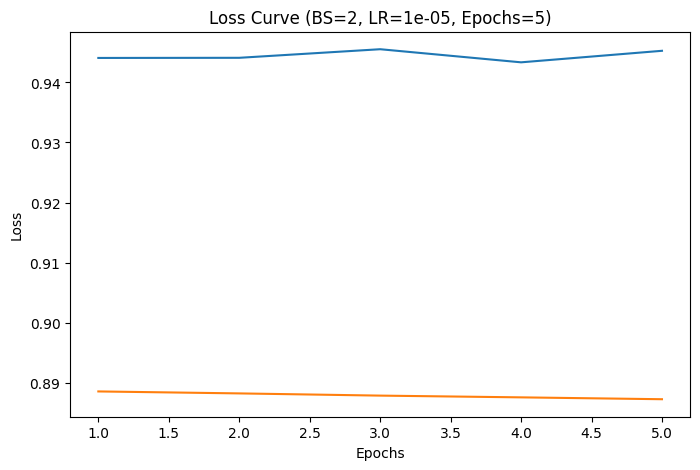

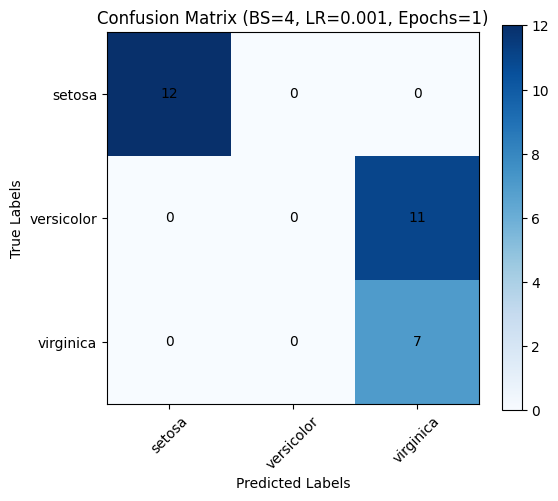

Sample Predictions:
Input: [0.13888889 0.41666667 0.06779661 0.        ], Predicted: 0, True: 0
Input: [0.38888889 0.75       0.11864407 0.08333333], Predicted: 0, True: 0
Input: [0.36111111 0.20833333 0.49152542 0.41666667], Predicted: 2, True: 1
Input: [0.30555556 0.79166667 0.05084746 0.125     ], Predicted: 0, True: 0
Input: [0.08333333 0.66666667 0.         0.04166667], Predicted: 0, True: 0


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


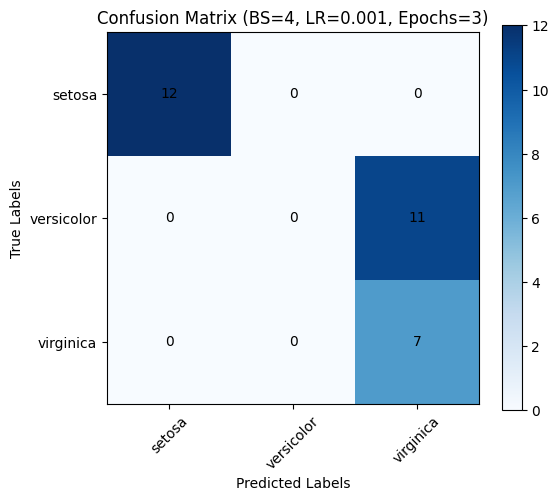

Sample Predictions:
Input: [0.16666667 0.45833333 0.08474576 0.        ], Predicted: 0, True: 0
Input: [0.08333333 0.66666667 0.         0.04166667], Predicted: 0, True: 0
Input: [0.58333333 0.33333333 0.77966102 0.875     ], Predicted: 2, True: 2
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.38888889 0.75       0.11864407 0.08333333], Predicted: 0, True: 0


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


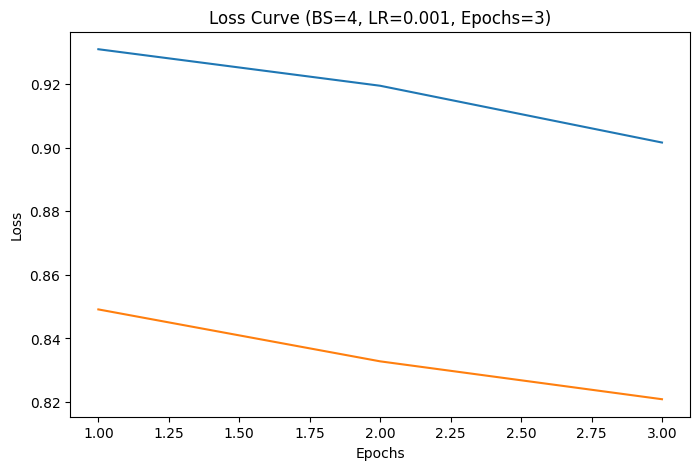

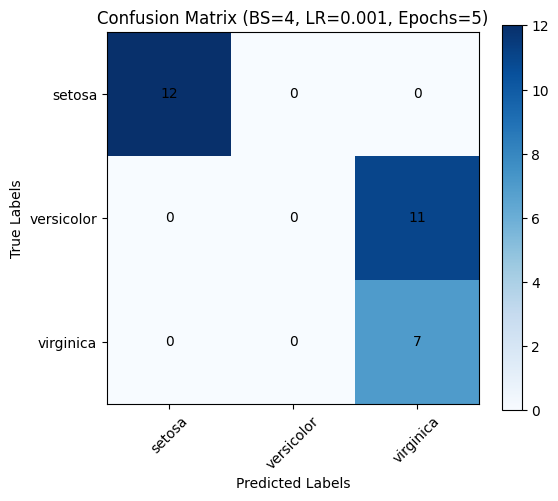

/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sample Predictions:
Input: [0.16666667 0.45833333 0.08474576 0.        ], Predicted: 0, True: 0
Input: [0.13888889 0.58333333 0.10169492 0.04166667], Predicted: 0, True: 0
Input: [0.33333333 0.625      0.05084746 0.04166667], Predicted: 0, True: 0
Input: [0.13888889 0.41666667 0.06779661 0.        ], Predicted: 0, True: 0
Input: [0.47222222 0.58333333 0.59322034 0.625     ], Predicted: 2, True: 1


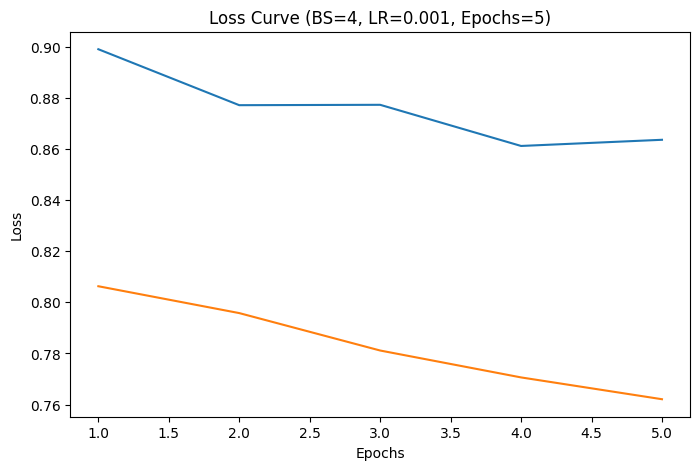

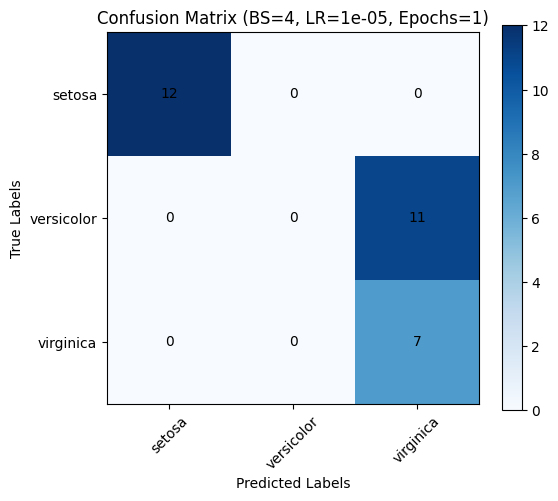

Sample Predictions:
Input: [0.25       0.875      0.08474576 0.        ], Predicted: 0, True: 0
Input: [0.33333333 0.625      0.05084746 0.04166667], Predicted: 0, True: 0
Input: [0.38888889 1.         0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.52777778 0.08333333 0.59322034 0.58333333], Predicted: 2, True: 1
Input: [0.30555556 0.79166667 0.05084746 0.125     ], Predicted: 0, True: 0


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


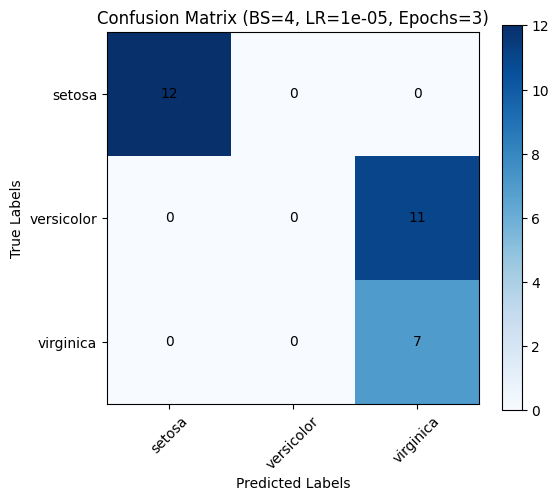

Sample Predictions:
Input: [0.38888889 1.         0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.30555556 0.79166667 0.05084746 0.125     ], Predicted: 0, True: 0
Input: [0.30555556 0.58333333 0.08474576 0.125     ], Predicted: 0, True: 0
Input: [0.13888889 0.45833333 0.10169492 0.04166667], Predicted: 0, True: 0
Input: [0.66666667 0.20833333 0.81355932 0.70833333], Predicted: 2, True: 2


/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


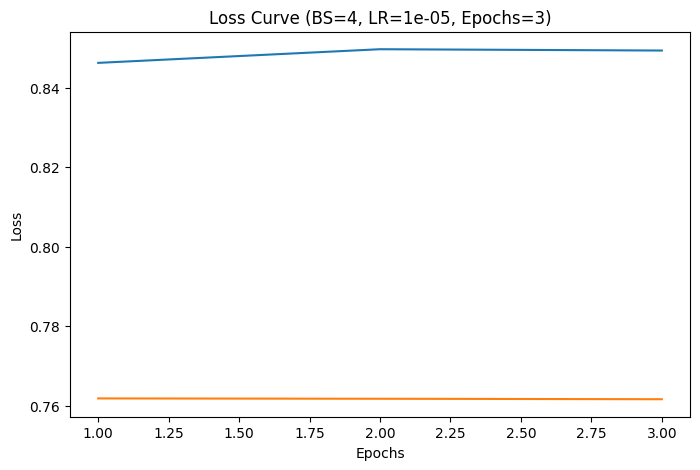

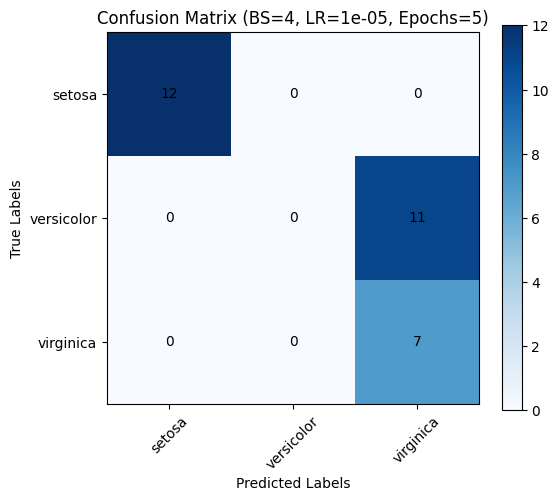

Sample Predictions:
Input: [0.61111111 0.41666667 0.81355932 0.875     ], Predicted: 2, True: 2
Input: [0.5        0.33333333 0.62711864 0.45833333], Predicted: 2, True: 1
Input: [0.66666667 0.45833333 0.57627119 0.54166667], Predicted: 2, True: 1
Input: [0.55555556 0.20833333 0.6779661  0.75      ], Predicted: 2, True: 2
Input: [0.58333333 0.33333333 0.77966102 0.875     ], Predicted: 2, True: 2
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 1, 'accuracy': 0.4, 'f1_score': 0.22857142857142856}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 3, 'accuracy': 0.7666666666666667, 'f1_score': 0.67816091954023}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 5, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 1, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 3, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'le

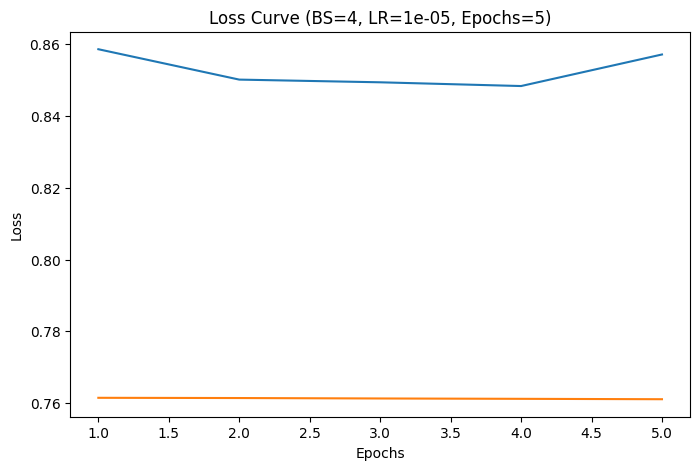

In [21]:
loss_fn = nn.CrossEntropyLoss()

results = []

# Grid Search
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for epochs in epochs_list:
            train_dataset = TensorDataset(X_train, y_train)
            train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            all_train_loss, all_val_loss = [], []

            # Training the model
            for epoch in range(epochs):
                model.train()
                train_loss = 0
                for X_batch, y_batch in train_dataloader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    y_pred = model(X_batch.float())
                    loss = loss_fn(y_pred, y_batch)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    train_loss += loss.item()

                all_train_loss.append(train_loss / len(train_dataloader))

                model.eval()
                with torch.no_grad():
                    y_val_pred = model(X_val.float())
                    val_loss = loss_fn(y_val_pred, y_val).item()

                all_val_loss.append(val_loss)

            model.eval()
            with torch.no_grad():
                y_test_pred = model(X_test.float())

            y_true = torch.argmax(y_test, dim=1).cpu().numpy()
            y_pred = y_test_pred.argmax(1).cpu().numpy()

            accuracy = accuracy_score(y_true, y_pred)
            precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

            results.append({
                "batch_size": batch_size,
                "learning_rate": learning_rate,
                "epochs": epochs,
                "accuracy": accuracy,
                "f1_score": f1_score
            })

            # plotting the confusion matrix
            conf_matrix = confusion_matrix(y_true, y_pred)

            class_labels = iris.target_names
            tick_marks = np.arange(len(class_labels))
            fig, ax = plt.subplots(figsize=(6, 5))
            im = ax.imshow(conf_matrix, cmap="Blues", interpolation="nearest")

            plt.colorbar(im)

            ax.set_xticks(np.arange(len(class_labels)))
            ax.set_yticks(np.arange(len(class_labels)))
            ax.set_xticklabels(class_labels, rotation=45)
            ax.set_yticklabels(class_labels)
            ax.set_xlabel("Predicted Labels")
            ax.set_ylabel("True Labels")
            ax.set_title(f"Confusion Matrix (BS={batch_size}, LR={learning_rate}, Epochs={epochs})")

            for i in range(conf_matrix.shape[0]):
                for j in range(conf_matrix.shape[1]):
                    ax.text(j, i, str(conf_matrix[i, j]), ha="center", va="center", color="black")

            plt.show()
            plt.close(fig)

            # plotting the training vs validation loss
            if epochs > 1:
                plt.figure(figsize=(8, 5))
                plt.plot(range(1, epochs+1), all_train_loss, label="Training Loss")
                plt.plot(range(1, epochs+1), all_val_loss, label="Validation Loss")
                plt.xlabel("Epochs")
                plt.ylabel("Loss")
                plt.title(f"Loss Curve (BS={batch_size}, LR={learning_rate}, Epochs={epochs})")

            sample_indices = np.random.choice(len(y_true), 5, replace=False)
            print("Sample Predictions:")
            for idx in sample_indices:
                print(f"Input: {X_test[idx].cpu().numpy()}, Predicted: {y_pred[idx]}, True: {y_true[idx]}")

for res in results:
    print(res)

## Task 2

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [7]:
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target

train_test, val = train_test_split(iris_pd, test_size=0.1, stratify=iris_pd['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2 / 0.9, stratify=train_test['target'], random_state=42)

In [8]:
def create_tabular_predictor(searcher):
    return TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy').fit(
        hyperparameter_tune_kwargs={
            'num_trials': 10,
            'scheduler': 'local',
            'searcher': searcher
        },
        train_data=train_data,
        tuning_data=val_data,
        hyperparameters={
            'NN_TORCH': {
                'batch_size': ag.space.Categorical(2, 4),
                'num_epochs': ag.space.Categorical(1, 3, 5),
                'learning_rate': ag.space.Categorical(1e-3, 1e-5),
                'num_layers': 1,
                'hidden_size': 16,
                'activation': 'relu'
            }
        },
        num_bag_folds=5,
        num_stack_levels=0,
        use_bag_holdout=True,
        time_limit=100
    )

In [9]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(train)
test_data = TabularDataset(test)
val_data = TabularDataset(val)
y_test = test_data['target']

/home/sriv/PycharmProjects/STT-AI-Lab06/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
random_predictor = create_tabular_predictor('random')

Fitted model: NeuralNetTorch_BAG_L1/7ac85_00000 ...
	0.4904	 = Validation score   (accuracy)
	6.96s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00001 ...
	0.6346	 = Validation score   (accuracy)
	7.02s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00002 ...
	0.0192	 = Validation score   (accuracy)
	6.96s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00003 ...
	0.625	 = Validation score   (accuracy)
	12.91s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00004 ...
	0.0192	 = Validation score   (accuracy)
	10.66s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00005 ...
	0.7019	 = Validation score   (accuracy)
	9.68s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/7ac85_00006 ...
	0.3269	 = Validation score   (accuracy)


In [11]:
y_pred = random_predictor.predict(test_data.drop(columns=['target']))
print('Random Search')
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Random Search
Test Accuracy: 0.7419
Test F1: 0.7355


In [24]:
print("Performance of Random Search:")
leaderboard = random_predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])

Performance of Random Search:
                                model  score_test   fit_time
0   NeuralNetTorch_BAG_L1/7ac85_00008    0.741935   9.821867
1                 WeightedEnsemble_L2    0.741935   9.831600
2   NeuralNetTorch_BAG_L1/7ac85_00005    0.677419   9.681334
3   NeuralNetTorch_BAG_L1/7ac85_00003    0.612903  12.906912
4   NeuralNetTorch_BAG_L1/7ac85_00001    0.548387   7.019866
5   NeuralNetTorch_BAG_L1/7ac85_00000    0.354839   6.962834
6   NeuralNetTorch_BAG_L1/7ac85_00006    0.225806   8.709820
7   NeuralNetTorch_BAG_L1/7ac85_00007    0.032258   7.684948
8   NeuralNetTorch_BAG_L1/7ac85_00009    0.032258   9.714042
9   NeuralNetTorch_BAG_L1/7ac85_00004    0.032258  10.662948
10  NeuralNetTorch_BAG_L1/7ac85_00002    0.032258   6.956687


In [13]:
# Hyperband Search + Bayes Optimization
hyperband_predictor = create_tabular_predictor('bayes')

Fitted model: NeuralNetTorch_BAG_L1/4a8b09c1 ...
	0.4904	 = Validation score   (accuracy)
	8.62s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/5011a7f0 ...
	0.8558	 = Validation score   (accuracy)
	11.37s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/ac5ac031 ...
	0.3077	 = Validation score   (accuracy)
	11.42s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/61fd2734 ...
	0.2981	 = Validation score   (accuracy)
	11.61s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/8a9cd8ab ...
	0.0288	 = Validation score   (accuracy)
	12.61s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/34db0c4d ...
	0.0192	 = Validation score   (accuracy)
	13.75s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/62a6cf9f ...
	0.0288	 = Validation score   (accuracy)
	15.26s	 = Traini

In [14]:
y_pred = hyperband_predictor.predict(test_data.drop(columns=['target']))
print('Hyperband Search + Bayes Optimization')
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Hyperband Search + Bayes Optimization
Test Accuracy: 0.8387
Test F1: 0.8365


In [15]:
print("Performance of Hyperband Search + Bayes Optimization:")
leaderboard = hyperband_predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])

Performance of Hyperband Search + Bayes Optimization:
                             model  score_test   fit_time
0   NeuralNetTorch_BAG_L1/5011a7f0    0.838710  11.370120
1              WeightedEnsemble_L2    0.838710  11.375233
2   NeuralNetTorch_BAG_L1/8ec7d25e    0.677419   6.274968
3   NeuralNetTorch_BAG_L1/69041fcd    0.612903  13.741214
4   NeuralNetTorch_BAG_L1/fc3e289f    0.516129   9.166174
5   NeuralNetTorch_BAG_L1/4a8b09c1    0.354839   8.615450
6   NeuralNetTorch_BAG_L1/61fd2734    0.096774  11.607441
7   NeuralNetTorch_BAG_L1/ac5ac031    0.096774  11.421770
8   NeuralNetTorch_BAG_L1/8a9cd8ab    0.032258  12.612264
9   NeuralNetTorch_BAG_L1/34db0c4d    0.032258  13.749524
10  NeuralNetTorch_BAG_L1/62a6cf9f    0.032258  15.259970


In [23]:
print('Grid Search results:')
for res in results:
    print(res)

Grid Search results:
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 1, 'accuracy': 0.4, 'f1_score': 0.22857142857142856}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 3, 'accuracy': 0.7666666666666667, 'f1_score': 0.67816091954023}
{'batch_size': 2, 'learning_rate': 0.001, 'epochs': 5, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 1, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 3, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 5, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 4, 'learning_rate': 0.001, 'epochs': 1, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 4, 'learning_rate': 0.001, 'epochs': 3, 'accuracy': 0.6333333333333333, 'f1_score': 0.5306666666666666}
{'batch_size': 4, 'learning_rate': 0.001, '